In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm
from scipy import optimize
from scipy import interpolate
import time
import random
import pickle as pkl
from cratrcountr import *
%matplotlib inline

## Example of generating synthetic data

In [2]:
synth_area = 10000
pf = loglog_linear_pf(N1=0.001, slope=-2)

if False:
    synth_list, synth_age = synth_data(model_lambda=20, n_steps=100000, area=synth_area,
                                       pf=pf,
                                       dmin=1, dmax=10**3.5)
    with open('saved/synth_list.pkl', 'wb') as f:
        pkl.dump(synth_list, f)
    with open('saved/synth_age.pkl', 'wb') as f:
        pkl.dump(synth_age, f)
        
else:
    with open('saved/synth_list.pkl', 'rb') as f:
        synth_list = pkl.load(f)
    with open('saved/synth_age.pkl', 'rb') as f:
        synth_age = pkl.load(f)

with open('example20A.pkl', 'rb') as f:
    example20A = pkl.load(f)

if False:
    
    synth_list_20, synth_age_20 = synth_data(model_lambda=20, n_steps=100000, area=synth_area,
                                       pf=pf,
                                       dmin=1, dmax=10**3.5)
    with open('saved/synth_list_20.pkl', 'wb') as f:
        pkl.dump(synth_list_20, f)
    with open('saved/synth_age_20.pkl', 'wb') as f:
        pkl.dump(synth_age_20, f)
        
    synth_list_200, synth_age_200 = synth_data(model_lambda=200, n_steps=100000, area=synth_area,
                                       pf=pf,
                                       dmin=1, dmax=10**3.5)
    with open('saved/synth_list_200.pkl', 'wb') as f:
        pkl.dump(synth_list_200, f)
    with open('saved/synth_age_200.pkl', 'wb') as f:
        pkl.dump(synth_age_200, f)
        
    synth_list_2000, synth_age_2000 = synth_data(model_lambda=2000, n_steps=100000, area=synth_area,
                                       pf=pf,
                                       dmin=1, dmax=10**3.5)
    with open('saved/synth_list_2000.pkl', 'wb') as f:
        pkl.dump(synth_list_2000, f)
    with open('saved/synth_age_2000.pkl', 'wb') as f:
        pkl.dump(synth_age_2000, f)
        
    synth_list_10, synth_age_10 = synth_data(model_lambda=10, n_steps=100000, area=synth_area,
                                       pf=pf,
                                       dmin=1, dmax=10**3.5)
    with open('saved/synth_list_10.pkl', 'wb') as f:
        pkl.dump(synth_list_10, f)
    with open('saved/synth_age_10.pkl', 'wb') as f:
        pkl.dump(synth_age_10, f)
        
else:
    
    with open('saved/synth_list_20.pkl', 'rb') as f:
        synth_list_20 = pkl.load(f)
    with open('saved/synth_age_20.pkl', 'rb') as f:
        synth_age_20 = pkl.load(f)
    
    with open('saved/synth_list_200.pkl', 'rb') as f:
        synth_list_200 = pkl.load(f)
    with open('saved/synth_age_200.pkl', 'rb') as f:
        synth_age_200 = pkl.load(f)
    
    with open('saved/synth_list_2000.pkl', 'rb') as f:
        synth_list_2000 = pkl.load(f)
    with open('saved/synth_age_2000.pkl', 'rb') as f:
        synth_age_2000 = pkl.load(f)
        
    with open('saved/synth_list_10.pkl', 'rb') as f:
        synth_list_10 = pkl.load(f)
    with open('saved/synth_age_10.pkl', 'rb') as f:
        synth_age_10 = pkl.load(f)

## Empirical confirmation of the Michael et al. (2016) proof

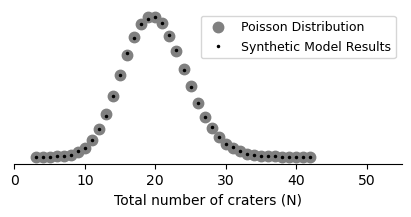

In [39]:
fig = plt.figure(figsize=(5,2))
ax = fig.add_subplot(111)
N_array = np.array([ds.shape[0] for ds in synth_list_20])
N_values, N_counts = np.unique(N_array, return_counts=True)
N_probabilities = N_counts / len(synth_list_20)
plt.plot(N_values, poisson.pmf(N_values, 20), '.', markersize=15, color='gray', label='Poisson Distribution')
plt.plot(N_values, N_probabilities, 'k.', markersize=3, label='Synthetic Model Results')
plt.legend(loc='upper right', fontsize=9)
plt.xlabel('Total number of craters (N)')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xlim([0, 55])
pfig=plt.gcf()
pfig.savefig('../synthfigs/ConfirmationOfMichaelEtAl2016Proof.pdf', bbox_inches = 'tight')

## Modeling individual plot types

In [3]:
if False:
    t1 = time.time()
    slope_list, age_list, failure_df = model_fitting_error(
                    synth_list, synth_age, synth_area, 
                    pf=pf,
                    bin_width_exponent=neukum_bwe, use_uncertainties=False, 
                    sqrt_N=False, pick_a_side=False,
                    plot_type='unbinned corrected', skip_zero_crater_bins=False, 
                    n_pseudosteps=100000)
    t2 = time.time()
    print(format_runtime(t2 - t1))
    with open('saved/slope_list.pkl', 'wb') as f:
        pkl.dump(slope_list, f)
    with open('saved/age_list.pkl', 'wb') as f:
        pkl.dump(age_list, f)
    with open('saved/failure_df.pkl', 'wb') as f:
        pkl.dump(failure_df, f)
else:
    with open('saved/slope_list.pkl', 'rb') as f:
        slope_list = pkl.load(f)
    with open('saved/age_list.pkl', 'rb') as f:
        age_list = pkl.load(f)
    with open('saved/failure_df.pkl', 'rb') as f:
        failure_df = pkl.load(f)

<AxesSubplot:>

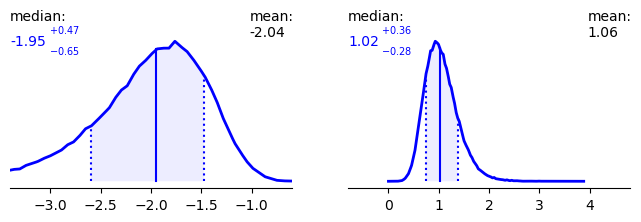

In [14]:
fig = plt.figure(figsize=(8, 2))
ax = fig.add_subplot(121)
plot_result_pdf(slope_list, ax=ax, xlim=[-3.4, -0.6], slope_data=True)
ax = fig.add_subplot(122)
plot_result_pdf(age_list, ax=ax, xlim=[-0.8, 4.8], reference_value=synth_age)

Check the accuracy of the slope log space normal fit.

(-0.3, 0.7)

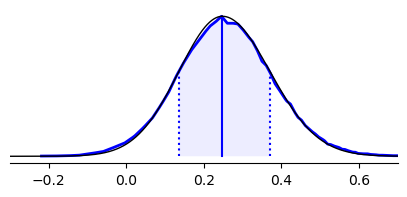

In [6]:
slope_pdf = make_pdf_from_samples(slope_list, slope_data=True)
(-1 * slope_pdf).log().plot()
log_max, log_lower, log_upper = fit_slope_data(slope_list)
plot_log_of_normal_fit(log_max, log_lower, log_upper, color='black')
plt.xlim(-0.3,0.7)

## Demonstration that lambda variation does not affect slope modeling

In [32]:
model_N=20
area=10000
n_steps=30000
inc=0.001
pf=loglog_linear_pf(N1=0.001, slope=-2)
dmin=1
dmax=1E5
dmax_tolerance=0.00001
runtime_off=True
saved_data_on=False

n_lambda = 100

lambda_min = true_error_pdf(model_N).percentile(0.001)
lambda_max = true_error_pdf(model_N).percentile(0.999)
lambda_domain = np.linspace(lambda_min, lambda_max, n_lambda)

t1 = time.time()

def synth_i(model_lambda):
    synth_age = model_lambda / (10**pf(np.log10(dmin)) * area)
    logd_array = np.arange(np.log10(dmin) + inc / 2, np.log10(dmax) + inc / 2, inc)
    cumulative_lambda_array = 10**pf(logd_array) * area * synth_age
    logd_array = logd_array[cumulative_lambda_array > dmax_tolerance]
    if not runtime_off:
        print(str(logd_array.shape[0]) + ' lambda bins')
    left_edge_lambda = 10**pf(logd_array - inc/2)
    right_edge_lambda = 10**pf(logd_array + inc/2)
    lambda_array = (left_edge_lambda - right_edge_lambda) * area * synth_age
    slope_array = (left_edge_lambda - right_edge_lambda) / inc
    lambda_array *= differential_correction(10**inc, slope_array)
    bin_count_array = sample_by_Poisson(lambda_array, n_steps, saved_data_on, runtime_off)
    bin_count_list = list(bin_count_array[bin_count_array.sum(axis=1)==model_N])
    synth_list_raw = [10**np.repeat(logd_array, bin_count_array) for bin_count_array in bin_count_list]
    synth_list = randomize_synth_data(synth_list_raw, left_edge_lambda, right_edge_lambda, inc)
    return synth_list

synth_list_nested = [synth_i(model_lambda) for model_lambda in lambda_domain]
synth_list_fixed_N = [item for sublist in synth_list_nested for item in sublist]



# synth_list_fixed_N = [synth_data(model_lambda=model_lambda, saved_data_on=True,
#                      n_steps=1000, runtime_off=False) for model_lambda in lambda_array]
t2 = time.time()
print(format_runtime(t2 - t1))

4 minutes, 1.94299 seconds


In [27]:
synth_age_for_fitting_guess = model_N / (10**pf(
                                                np.log10(dmin)) * area)
nested_slope_list = [model_fitting_error(
                    synth_list_i, synth_age_for_fitting_guess, area, 
                    pf=pf,
                    bin_width_exponent=neukum_bwe, use_uncertainties=False, 
                    sqrt_N=False, pick_a_side=False, skip_age=True,
                    plot_type='unbinned corrected', skip_zero_crater_bins=False, 
                    n_pseudosteps=len(synth_list_i))[0] for synth_list_i in synth_list_nested]

Text(0, 0.5, 'slope')

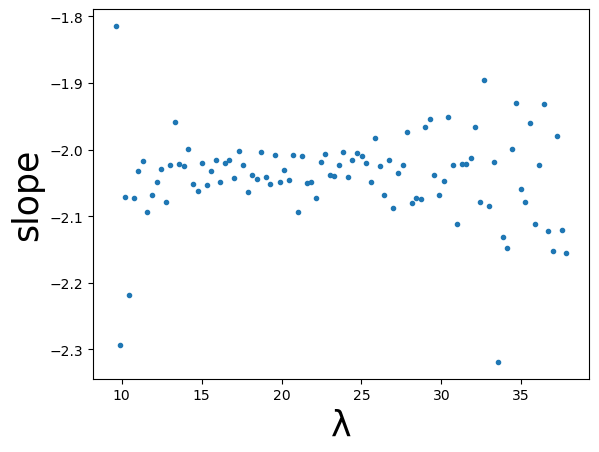

In [31]:
plt.plot(lambda_domain, [np.mean(slope_list) for slope_list in nested_slope_list], '.')
plt.xlabel('λ', size=25)
plt.ylabel('slope', size=25)

## Modeling with fixed N

In [128]:
t1 = time.time()
if False:
    synth_list_variable_N, synth_age = synth_data(model_lambda=20, n_steps=3000000, 
                                                  N_must_match_lambda=False)

    slope_list_variable_N, age_list, failure_df = model_fitting_error(
                        synth_list_variable_N, synth_age, synth_area, 
                        pf=loglog_linear_pf(N1=0.001, slope=-2),
                        bin_width_exponent=neukum_bwe, use_uncertainties=False, 
                        sqrt_N=False, pick_a_side=False, skip_age=True,
                        plot_type='unbinned corrected', skip_zero_crater_bins=False, 
                        n_pseudosteps=len(synth_list_variable_N))
    with open('saved/variable_N_tuple.pkl', 'wb') as f:
        pkl.dump(tuple([synth_list_variable_N, 
                        slope_list_variable_N, synth_age]), f)
else:
    with open('saved/variable_N_tuple.pkl', 'rb') as f:
        synth_list_variable_N, slope_list_variable_N, synth_age = pkl.load(f)
t2 = time.time()
print('Total runtime: ' + format_runtime(t2 - t1))

Total runtime: 6.43728 seconds


In [129]:
t1 = time.time()
if True:
    slope_left_list_variable_N, age_list, failure_df = model_fitting_error(
                        synth_list_variable_N, synth_age, synth_area, 
                        pf=loglog_linear_pf(N1=0.001, slope=-2),
                        bin_width_exponent=neukum_bwe, use_uncertainties=False, 
                        sqrt_N=False, pick_a_side=False, skip_age=True,
                        plot_type='left', skip_zero_crater_bins=False, 
                        start_at_reference_point=True, reference_point=1.0,
                        n_pseudosteps=len(synth_list_variable_N))
    with open('saved/slope_left_list_variable_N.pkl', 'wb') as f:
        pkl.dump(slope_left_list_variable_N, f)
else:
    with open('saved/slope_left_list_variable_N.pkl', 'rb') as f:
        slope_left_list_variable_N = pkl.load(f)
t2 = time.time()
print('Total runtime: ' + format_runtime(t2 - t1))

         i  N                                             Reason
0  1615216  5  These craters fall into only one bin, so no sl...
Total runtime: 14 minutes, 3.68386 seconds


Text(0.7, 1.1600000000000001, 'All N')

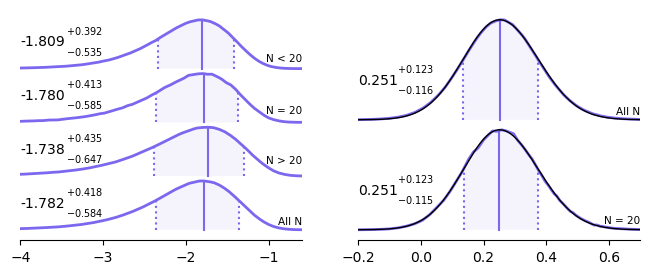

In [22]:
model_N = 20

N_list = [ds.shape[0] for ds in synth_list_variable_N]

grouped_dict = {}
for key, item in zip(N_list, slope_list_variable_N):
    if key not in grouped_dict:
        grouped_dict[key] = []
    grouped_dict[key].append(item)

Ns = np.array(sorted(list(grouped_dict.keys())))

N_count = np.array([len(grouped_dict[N]) for N in Ns])

def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

low_end = flatten_list([grouped_dict[N] for N in Ns[Ns > model_N]])
at_N = flatten_list([grouped_dict[N] for N in Ns[Ns == model_N]])
high_end = flatten_list([grouped_dict[N] for N in Ns[Ns < model_N]])

xlim = [-4, -0.6]
label_shift_y = -0.25
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
make_pdf_from_samples(low_end, slope_data=True).plot(
        upshift=3.3, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.15 + 3.3, 'N < ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(at_N, slope_data=True).plot(
        upshift=2.2, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.19 + 2.2, 'N = ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(high_end, slope_data=True).plot(
        upshift=1.1, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.26 + 1.1, 'N > ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(slope_list_variable_N, slope_data=True).plot(
        ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.11, 'All N', size=7.5, color='black', 
         ha='right')

ax = ax = fig.add_subplot(122)
slope_array = np.array(at_N)
slope_pdf = make_pdf_from_samples(slope_array, slope_data=True)
slope_pdf.flip().log().plot(color='mediumslateblue', 
                             label=True, rounding_n=3,
                             ax=ax, xlim=[-0.2, 0.7],
                             label_shift_y=-0.4, 
                             label_color='black')
log_max, log_lower, log_upper = fit_slope_data(slope_array)
plot_log_of_normal_fit(log_max, log_lower, log_upper, color='black')
plt.text(0.7, 0.07, 'N = ' + str(model_N), 
         size=7.5, color='black', ha='right')

slope_array = np.array(slope_list_variable_N)
slope_pdf = make_pdf_from_samples(slope_array, slope_data=True)
slope_pdf.flip().log().plot(color='mediumslateblue', 
                            label=True, rounding_n=3, 
                            upshift=1.1, ax=ax, xlim=[-0.2, 0.7],
                            label_shift_y=-0.4, 
                            label_color='black')
log_max, log_lower, log_upper = fit_slope_data(slope_array)
plot_log_of_normal_fit(log_max, log_lower, log_upper, 
                       color='black', upshift=1.1)
plt.text(0.7, 0.06 + 1.1, 'All N', size=7.5, 
         color='black', ha='right')

Text(0.7, 1.1600000000000001, 'All N')

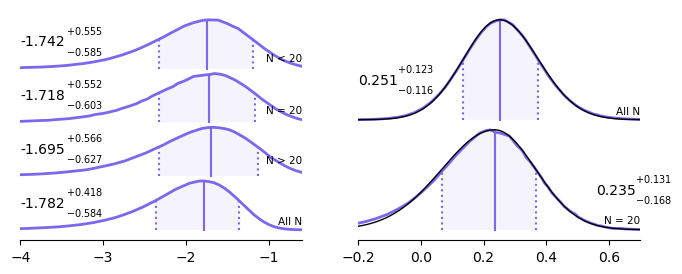

In [131]:
model_N = 20

N_list = [ds.shape[0] for ds in synth_list_variable_N]

grouped_dict = {}
for key, item in zip(N_list, slope_left_list_variable_N):
    if key not in grouped_dict:
        grouped_dict[key] = []
    grouped_dict[key].append(item)

Ns = np.array(sorted(list(grouped_dict.keys())))

N_count = np.array([len(grouped_dict[N]) for N in Ns])

def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

low_end = flatten_list([grouped_dict[N] for N in Ns[Ns > model_N]])
at_N = flatten_list([grouped_dict[N] for N in Ns[Ns == model_N]])
high_end = flatten_list([grouped_dict[N] for N in Ns[Ns < model_N]])

xlim = [-4, -0.6]
label_shift_y = -0.25
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
make_pdf_from_samples(low_end, slope_data=True).plot(
        upshift=3.3, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.15 + 3.3, 'N < ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(at_N, slope_data=True).plot(
        upshift=2.2, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.19 + 2.2, 'N = ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(high_end, slope_data=True).plot(
        upshift=1.1, ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.26 + 1.1, 'N > ' + str(model_N), 
         size=7.5, color='black', ha='right')
make_pdf_from_samples(slope_list_variable_N, slope_data=True).plot(
        ax=ax, xlim=xlim, label=True, 
        label_shift_y=label_shift_y, rounding_n=3,
        label_color='black')
plt.text(-0.6, 0.11, 'All N', size=7.5, color='black', 
         ha='right')

ax = ax = fig.add_subplot(122)
slope_array = np.array(at_N)
slope_pdf = make_pdf_from_samples(slope_array, slope_data=True)
slope_pdf.flip().log().plot(color='mediumslateblue', 
                             label=True, rounding_n=3,
                             ax=ax, xlim=[-0.2, 0.7],
                             label_shift_y=-0.4, 
                             label_color='black')
log_max, log_lower, log_upper = fit_slope_data(slope_array)
plot_log_of_normal_fit(log_max, log_lower, log_upper, color='black')
plt.text(0.7, 0.07, 'N = ' + str(model_N), 
         size=7.5, color='black', ha='right')

slope_array = np.array(slope_list_variable_N)
slope_pdf = make_pdf_from_samples(slope_array, slope_data=True)
slope_pdf.flip().log().plot(color='mediumslateblue', 
                            label=True, rounding_n=3, 
                            upshift=1.1, ax=ax, xlim=[-0.2, 0.7],
                            label_shift_y=-0.4, 
                            label_color='black')
log_max, log_lower, log_upper = fit_slope_data(slope_array)
plot_log_of_normal_fit(log_max, log_lower, log_upper, 
                       color='black', upshift=1.1)
plt.text(0.7, 0.06 + 1.1, 'All N', size=7.5, 
         color='black', ha='right')

## Reverse slope problem at N = λ = 20

In [4]:
# Warning: The volume of data produced here is extremely large.  Some computers
# may not be able to load it.  Make sure you have enough RAM.  Or run it in pieces.

mt1 = time.time()

model_lambda = 20
N1 = 0.001
synth_area = 10000
slope_list = np.linspace(-4, -0.1, 40)

if False:
    t1 = time.time()
    slope_model_ds = [synth_data(model_lambda=model_lambda, 
                                 area=synth_area, runtime_off=True,
                                 pf=loglog_linear_pf(N1=N1, slope=slope),
                                 dmin=1, dmax=10**min(-7.0 / slope, 15), 
                                 n_steps=100000, inc=0.001 * min(-7.0 / slope, 15) / 3.5) 
                      for slope in slope_list]
    t2 = time.time()
    print('Synthetic Generation Runtime: ' + format_runtime(t2 - t1))
    
    t1 = time.time()
    slope_results_list = [model_fitting_error(
                         synth_tuple[0], synth_tuple[1], synth_area,
                         pf=loglog_linear_pf(N1=N1, slope=-2.0),
                         bin_width_exponent=neukum_bwe, use_uncertainties=False,
                         plot_type='unbinned corrected', skip_zero_crater_bins=True,
                         reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                         n_pseudosteps=len(synth_tuple[0]), skip_age=True)
                         for synth_tuple in slope_model_ds]
    t2 = time.time()
    print('Slope Fitting Runtime: ' + format_runtime(t2 - t1))
    
    with open('slope_results_list.pkl', 'wb') as f:
        pkl.dump(slope_results_list, f)
    with open('saved/slope_model_ds.pkl', 'wb') as f:
        pkl.dump(slope_model_ds, f)
    with open('slope_list.pkl', 'wb') as f:
        pkl.dump(slope_list, f)
else:
    with open('saved/slope_model_ds.pkl', 'rb') as f:
        slope_model_ds = pkl.load(f)
    with open('slope_list.pkl', 'rb') as f:
        slope_list = pkl.load(f)
    with open('slope_results_list.pkl', 'rb') as f:
        slope_results_list = pkl.load(f)
    
mt2 = time.time()
print('Total Runtime: ' + format_runtime(mt2 - mt1))

Synthetic Generation Runtime: 8 minutes, 18.11038 seconds
Slope Fitting Runtime: 13 minutes, 36.02842 seconds
Total Runtime: 22 minutes, 22.72035 seconds


In [94]:
mt1 = time.time()
if False:
    slope_results_list_unbinned = [model_fitting_error(
                         synth_tuple[0], synth_tuple[1], synth_area,
                         pf=loglog_linear_pf(N1=N1, slope=-2.0),
                         bin_width_exponent=neukum_bwe, use_uncertainties=False,
                         plot_type='unbinned', skip_zero_crater_bins=True,
                         reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                         n_pseudosteps=len(synth_tuple[0]), skip_age=True)
                         for synth_tuple in slope_model_ds]
    with open('slope_results_list_unbinned.pkl', 'wb') as f:
        pkl.dump(slope_results_list_unbinned, f)
else:
    with open('slope_results_list_unbinned.pkl', 'rb') as f:
        slope_results_list_unbinned = pkl.load(f)
mt2 = time.time()
print('Total Runtime: ' + format_runtime(mt2 - mt1))

mt1 = time.time()
if False:
    slope_results_list_left = [model_fitting_error(
                         synth_tuple[0], synth_tuple[1], synth_area,
                         pf=loglog_linear_pf(N1=N1, slope=-2.0),
                         bin_width_exponent=neukum_bwe, use_uncertainties=False,
                         plot_type='left', skip_zero_crater_bins=True,
                         reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                         n_pseudosteps=len(synth_tuple[0]), skip_age=True)
                         for synth_tuple in slope_model_ds]
    with open('slope_results_list_left.pkl', 'wb') as f:
        pkl.dump(slope_results_list_left, f)
else:
    with open('slope_results_list_left.pkl', 'rb') as f:
        slope_results_list_left = pkl.load(f)
mt2 = time.time()
print('Total Runtime: ' + format_runtime(mt2 - mt1))

Total Runtime: 28 minutes, 28.75057 seconds
       i   N                                             Reason
0  69353  10  These craters fall into only one bin, so no sl...
       i  N                                             Reason
0  81159  2  These craters fall into only one bin, so no sl...
Total Runtime: 25 minutes, 37.60201 seconds


In [34]:
def plot_log_fit(slope_list, label_text='', upshift=0, ax=None):
    
    if ax is None:
        fig = plt.figure(figsize=(4, 2))
        ax = fig.add_subplot(111)
        
    slope_pdf = make_pdf_from_samples(slope_list, slope_data=True)
    slope_pdf.flip().log().plot(color='mediumslateblue', 
                                label=True, rounding_n=3, 
                                upshift=upshift, ax=ax,
                                label_shift_y=-0.4, 
                                label_color='black')
    log_max, log_lower, log_upper = fit_slope_data(slope_list)
    plot_log_of_normal_fit(log_max, log_lower, log_upper, 
                           color='black', upshift=upshift)
    plt.text(0.7, 0.06 + 1.1, label_text, size=7.5, 
         color='black', ha='right')

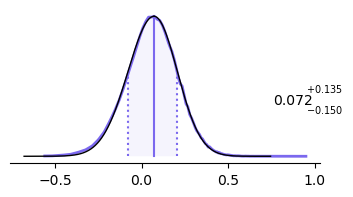

In [127]:
plot_log_fit(slope_results_list_left[-15][0])

<AxesSubplot:>

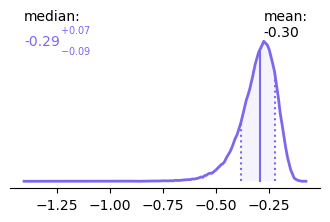

In [75]:
plot_result_pdf(slope_results_list[-3][0], slope_data=True)

In [99]:
slope_fit_matrix = np.array([fit_slope_data(result[0]) for result in slope_results_list])

slope_fit_matrix_unbinned = np.array([fit_slope_data(result[0]) for result in slope_results_list_unbinned])

slope_fit_matrix_left = np.array([fit_slope_data(result[0]) for result in slope_results_list_left])

In [41]:
lr = linregress(slope_list[:-1], (10**slope_fit_matrix[:,0] / slope_list)[:-1])

In [92]:
mean_slope_factor = np.mean((10**slope_fit_matrix[:,0] / slope_list)[:-1])
mean_upper = np.mean(slope_fit_matrix[:, 2][:-1])
mean_lower = np.mean(slope_fit_matrix[:, 1][:-2])

In [93]:
mean_upper, mean_lower 

(0.11936732641509319, 0.11252993097368656)

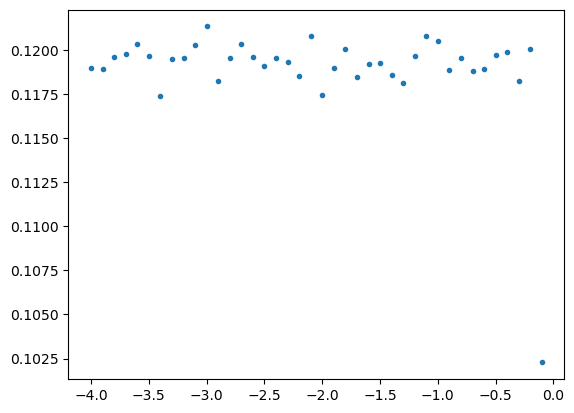

In [88]:
plt.plot(slope_list, slope_fit_matrix[:, 2], '.')

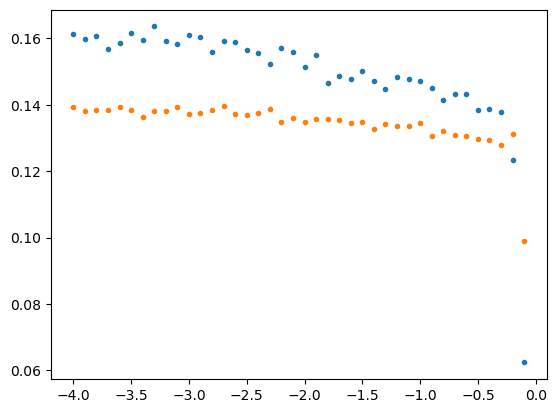

In [123]:
plt.plot(slope_list, slope_fit_matrix_left[:, 1], '.')
plt.plot(slope_list, slope_fit_matrix_left[:, 2], '.')

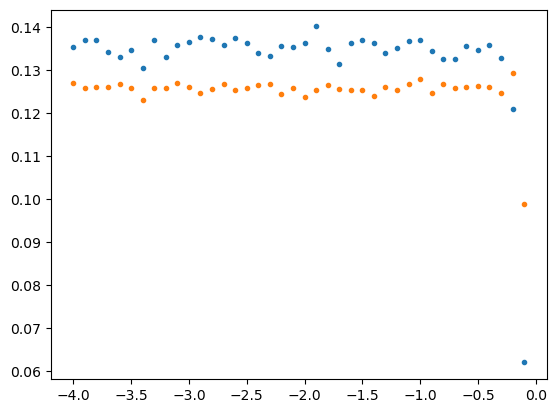

In [122]:
plt.plot(slope_list, slope_fit_matrix_unbinned[:, 1], '.')
plt.plot(slope_list, slope_fit_matrix_unbinned[:, 2], '.')

## Synthetic plotting type model results

Fix it so that the labels are calculated from the numerical distributions rather than the RandomVariable objects.

use_uncertainties: True
unbinned
use_uncertainties: False
unbinned
use_uncertainties: True
unbinned corrected
use_uncertainties: False
unbinned corrected
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
simple N
use_uncertainties: False
simple N
runtime: 7.37147 seconds
use_uncertainties: True
unbinned


/opt/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/sam/Data/chronology/cratrcountr/cratrcountr/random_variable_backend_module.py:37: RuntimeWarning: invalid value encountered in log10
  self.low = 10**(np.log10(self.max) - log_space_lower)
/Users/sam/Data/chronology/cratrcountr/cratrcountr/random_variable_backend_module.py:41: RuntimeWarning: invalid value encountered in log10
  self.high = 10**(np.log10(self.max) + log_space_upper)


use_uncertainties: False
unbinned
use_uncertainties: True
unbinned corrected
use_uncertainties: False
unbinned corrected
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
simple N
use_uncertainties: False
simple N
runtime: 8.82245 seconds
use_uncertainties: True
unbinned


/opt/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/sam/Data/chronology/cratrcountr/cratrcountr/random_variable_backend_module.py:37: RuntimeWarning: invalid value encountered in log10
  self.low = 10**(np.log10(self.max) - log_space_lower)
/Users/sam/Data/chronology/cratrcountr/cratrcountr/random_variable_backend_module.py:41: RuntimeWarning: invalid value encountered in log10
  self.high = 10**(np.log10(self.max) + log_space_upper)


use_uncertainties: False
unbinned
use_uncertainties: True
unbinned corrected
use_uncertainties: False
unbinned corrected
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
left
use_uncertainties: False
left
use_uncertainties: True
simple N
use_uncertainties: False
simple N
runtime: 20.54217 seconds


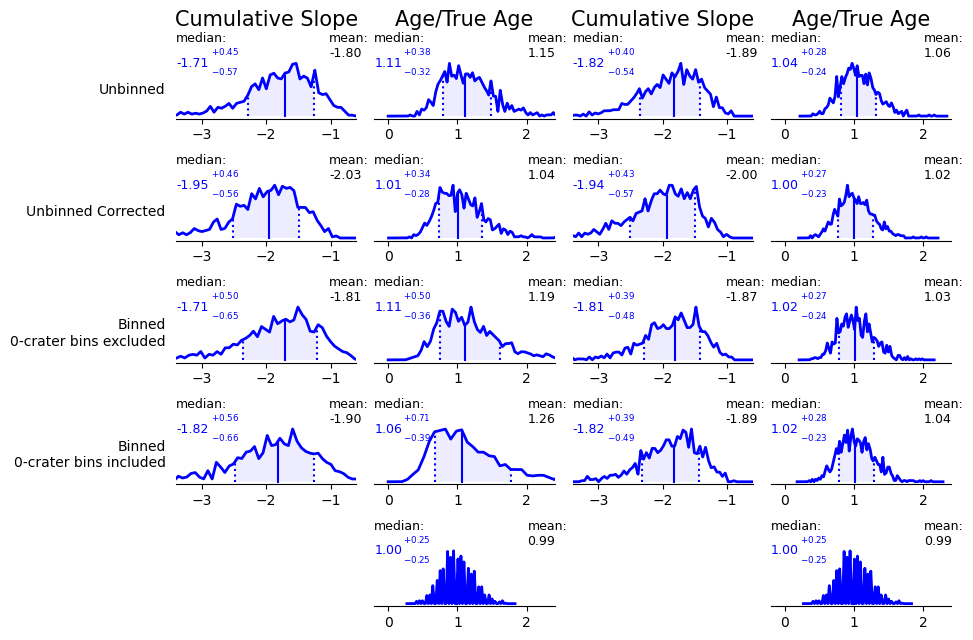

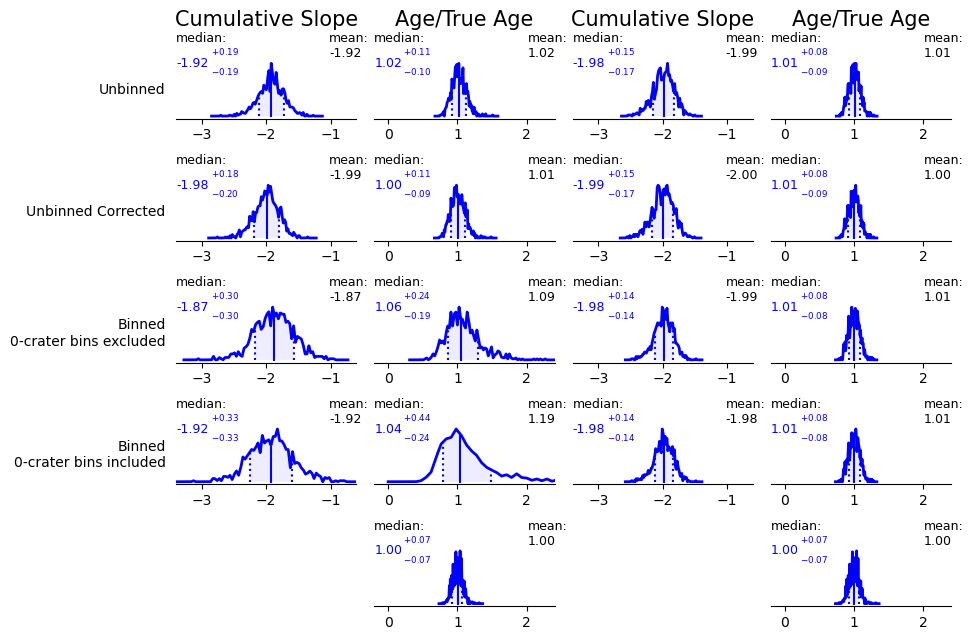

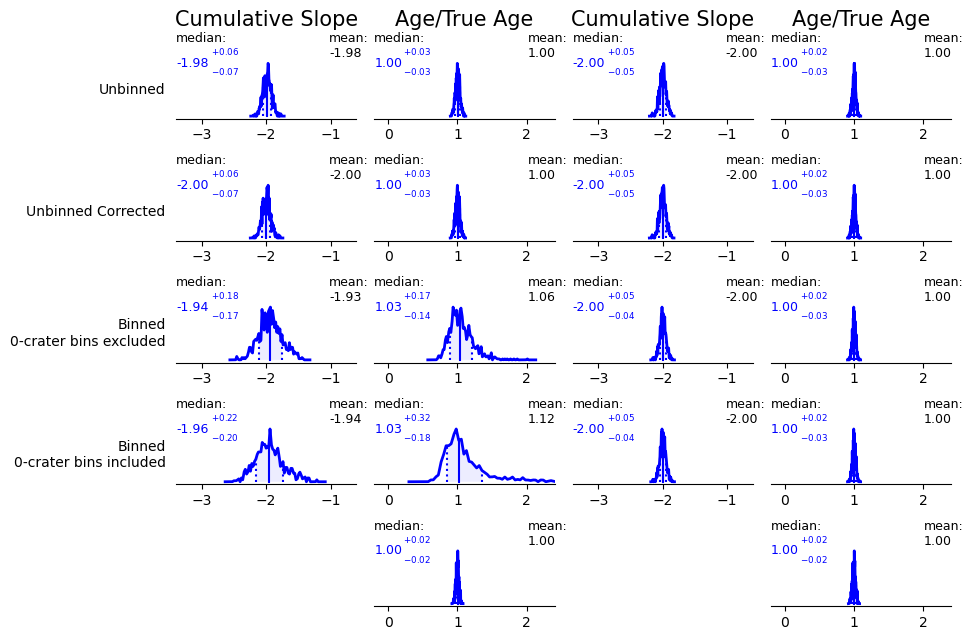

In [9]:
def get_ylabel_text(plot_type, skip_zero_crater_bins):
    if plot_type == 'Michael and Neukum (2010)':
        ylabel_text = 'Michael and Neukum\n(2010) Binning Scheme'
    elif plot_type == 'unbinned':
        ylabel_text = 'Unbinned'
    elif plot_type == 'unbinned corrected':
        ylabel_text = 'Unbinned Corrected'
    elif plot_type == 'simple N':
        ylabel_text = 'Simple N of Smallest\nCumulative Bin'
    else:
        ylabel_text = 'Binned'
        if plot_type in {'gmean', 'center'}:
            ylabel_text += ' (' + plot_type + ')'
        if skip_zero_crater_bins:
            ylabel_text += '\n' + '0-crater bins excluded'
        else:
            ylabel_text += '\n' + '0-crater bins included'
    return ylabel_text

n_pseudosteps=100000
do_calculations=True

for synth_lambda in [20, 200, 2000]:
    
    t1 = time.time()

    if synth_lambda == 20:
        synth_list = synth_list_20
        synth_age = synth_age_20
    elif synth_lambda == 200:
        synth_list = synth_list_200
        synth_age = synth_age_200
    elif synth_lambda == 2000:
        synth_list = synth_list_2000
        synth_age = synth_age_2000
        
    t1=time.time()
    fig = plt.figure(figsize=(10, 15))
    spacer = 0
    for plot_type in ['unbinned', 'unbinned corrected', 'left', 'simple N']:
        for skip_zero_crater_bins in [True, False]:
            if not ((plot_type == 'Michael and Neukum (2010)' or plot_type == 'unbinned'
                     or plot_type == 'unbinned corrected' or plot_type == 'simple N') and 
                     skip_zero_crater_bins == False):
                for use_uncertainties in [True, False]:
                    print('use_uncertainties: ' + str(use_uncertainties))
                    file_name = 'saved/results_tuple.' + str(synth_lambda) + '.' + str(plot_type) \
                                    + '.' + str(skip_zero_crater_bins) + '.' \
                                    + str(use_uncertainties) + '.' + str(n_pseudosteps) + '.pkl'
                    if do_calculations:
                        print(plot_type)
                        slope_list, age_list, failure_df = model_fitting_error(
                                            synth_list, synth_age, synth_area, 
                                            pf=pf,
                                            bin_width_exponent=neukum_bwe, 
                                            use_uncertainties=use_uncertainties, sqrt_N=False, 
                                            pick_a_side=False, plot_type=plot_type, d_min=1.0, 
                                            skip_zero_crater_bins=skip_zero_crater_bins, 
                                            n_pseudosteps=n_pseudosteps, reference_point=1.0,
                                            start_at_reference_point=True, print_failures=True)
                        with open(file_name, 'wb') as f:
                            pkl.dump(tuple([slope_list, age_list, failure_df]), f)
                    else:
                        with open(file_name, 'rb') as f:
                            slope_list, age_list, failure_df = pkl.load(f)

                    if plot_type != 'simple N':
                        ax = fig.add_subplot(10, 4, 1 + spacer + use_uncertainties * 2)
                        plot_result_pdf(slope_list, ax=ax, label_text_size=9, xlim=[-3.4, -0.6], 
                                        custom_label_height=1.32, fig_size_adjustor=2.7)
                        if spacer==0:
                            plt.title('Cumulative Slope', size=15, pad=25)
                        ylabel_text = get_ylabel_text(plot_type=plot_type,
                                                      skip_zero_crater_bins=skip_zero_crater_bins)
                        if not use_uncertainties:
                            plt.ylabel(ylabel_text, rotation='horizontal',ha='right',va='center', size=10)

                    ax = fig.add_subplot(10, 4, 2 + spacer + use_uncertainties * 2)
                    plot_result_pdf(age_list, ax=ax, label_text_size=9, xlim=[-0.2, 2.4], 
                                    reference_value=synth_age, custom_label_height=1.32,
                                    fig_size_adjustor=2.7)

                    if spacer==0:
                        plt.title('Age/True Age', size=15, pad=25)

                spacer += 4
                
    plt.subplots_adjust(wspace=0.1, hspace=1.1)
    
    pfig=plt.gcf()
    pfig.savefig('../synthfigs/cplot_fit_PDFs_' + str(synth_lambda) + '_' + str(n_pseudosteps) + '_.pdf',
                 bbox_inches = 'tight')
    
    t2 = time.time()
    print('runtime: ' + format_runtime(t2 - t1))

## Variation of deviation with λ

In [15]:
# Warning: The volume of data produced here is extremely large.  We're talking 31GB.  Some computers
# may not be able to load it.  Make sure you have enough RAM.  Or run it in pieces.

mt1 = time.time()

if False:
    lambda_list = np.round([10.0**(i) for i in np.arange(1, 4, 0.1)])
    synth_area = 10000
    synth_list_list = [synth_data(model_lambda=model_lambda, area=synth_area, 
                                  pf=pf,
                                  dmin=1, dmax=10**3.5, n_steps=100000, inc=0.001) 
                       for model_lambda in lambda_list]
    with open('saved/synth_list_list.pkl', 'wb') as f:
        pkl.dump(synth_list_list, f)
    with open('lambda_list.pkl', 'wb') as f:
        pkl.dump(lambda_list, f)
else:
    with open('saved/synth_list_list.pkl', 'rb') as f:
        synth_list_list = pkl.load(f)
    with open('lambda_list.pkl', 'rb') as f:
        lambda_list = pkl.load(f)
    
mt2 = time.time()
print('Total Runtime: ' + format_runtime(mt2 - mt1))

Total Runtime: 37.14155 seconds


In [16]:
true_age_array = np.array([synth_tuple[1] for synth_tuple in synth_list_list])

In [17]:
if False:

    t1 = time.time()

    slope_list_list_unbinned = []
    age_list_list_unbinned = []
    failure_df_list_unbinned = []
    for i in range(len(synth_list_list)):
        synth_tuple = synth_list_list[i]
        slope_list, age_list, failure_df_list = model_fitting_error(
                        synth_tuple[0], synth_tuple[1], synth_area,
                        pf=pf,
                        bin_width_exponent=neukum_bwe, use_uncertainties=False,
                        plot_type='unbinned', skip_zero_crater_bins=True,
                        reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                        n_pseudosteps=100000)
        slope_list_list_unbinned.append(slope_list)
        age_list_list_unbinned.append(age_list)
        failure_df_list_unbinned.append(failure_df_list)

    t2 = time.time()
    print('runtime: ' + format_runtime(t2 - t1))

    with open('saved/variation_with_lambda.unbinned.pkl', 'wb') as f:
        pkl.dump(tuple([slope_list_list_unbinned, age_list_list_unbinned, 
                        failure_df_list_unbinned]), f)
        
else:
    
    with open('saved/variation_with_lambda.unbinned.pkl', 'rb') as f:
        slope_list_list_unbinned, age_list_list_unbinned, failure_df_list_unbinned \
                    = pkl.load(f)

In [18]:
if False:

    t1 = time.time()

    slope_list_list_unbinned_corrected = []
    age_list_list_unbinned_corrected = []
    failure_df_list_unbinned_corrected = []
    for i in range(len(synth_list_list)):
        synth_tuple = synth_list_list[i]
        slope_list, age_list, failure_df_list = model_fitting_error(
                        synth_tuple[0], synth_tuple[1], synth_area,
                        pf=pf,
                        bin_width_exponent=neukum_bwe, use_uncertainties=False,
                        plot_type='unbinned corrected', skip_zero_crater_bins=True,
                        reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                        n_pseudosteps=100000)
        slope_list_list_unbinned_corrected.append(slope_list)
        age_list_list_unbinned_corrected.append(age_list)
        failure_df_list_unbinned_corrected.append(failure_df_list)

    t2 = time.time()
    print('runtime: ' + format_runtime(t2 - t1))

    with open('saved/variation_with_lambda.unbinned_corrected.pkl', 'wb') as f:
        pkl.dump(tuple([slope_list_list_unbinned_corrected, age_list_list_unbinned_corrected, 
                        failure_df_list_unbinned_corrected]), f)
        
else:
    
    with open('saved/variation_with_lambda.unbinned_corrected.pkl', 'rb') as f:
        slope_list_list_unbinned_corrected, age_list_list_unbinned_corrected, failure_df_list_unbinned_corrected \
                    = pkl.load(f)

In [19]:
t1 = time.time()

age_list_list_simple_N = []
failure_df_list_simple_N = []
for i in range(len(synth_list_list)):
    synth_tuple = synth_list_list[i]
    slope_list, age_list, failure_df_list = model_fitting_error(
                    synth_tuple[0], synth_tuple[1], synth_area,
                    pf=pf,
                    bin_width_exponent=neukum_bwe, use_uncertainties=False,
                    plot_type='simple N', skip_zero_crater_bins=True,
                    reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                    n_pseudosteps=100000)
    age_list_list_simple_N.append(age_list)
    failure_df_list_simple_N.append(failure_df_list)
    
t2 = time.time()
print('runtime: ' + format_runtime(t2 - t1))

runtime: 4.13097 seconds


In [20]:
if False:

    t1 = time.time()

    slope_list_list_left = []
    age_list_list_left = []
    failure_df_list_left = []
    for i in range(len(synth_list_list)):
        synth_tuple = synth_list_list[i]
        slope_list, age_list, failure_df = model_fitting_error(
                        synth_tuple[0], synth_tuple[1], synth_area,
                        pf=pf,
                        bin_width_exponent=neukum_bwe, use_uncertainties=False,
                        plot_type='left', skip_zero_crater_bins=True,
                        reference_point=1.0, start_at_reference_point=True, d_min=1.0,
                        n_pseudosteps=100000)
        slope_list_list_left.append(slope_list)
        age_list_list_left.append(age_list)
        failure_df_list_left.append(failure_df_list)

    t2 = time.time()
    print('runtime: ' + format_runtime(t2 - t1))

    with open('saved/variation_with_lambda.left.pkl', 'wb') as f:
        pkl.dump(tuple([slope_list_list_left, age_list_list_left, failure_df_list_left]), f)
        
else:
    
    with open('saved/variation_with_lambda.left.pkl', 'rb') as f:
        slope_list_list_left, age_list_list_left, failure_df_list_left = pkl.load(f)

In [291]:
mean_slope_list_unbinned = [np.mean(slope_list) for slope_list in slope_list_list_unbinned]
median_slope_list_unbinned = [np.median(slope_list) for slope_list in slope_list_list_unbinned]
high_slope_list_unbinned = [np.percentile(slope_list, 100 * p_1_sigma) for slope_list 
                                      in slope_list_list_unbinned]
low_slope_list_unbinned = [np.percentile(slope_list, 100 - 100 * p_1_sigma) for slope_list 
                                     in slope_list_list_unbinned]

mean_age_list_unbinned = [np.mean(age_list) for age_list in age_list_list_unbinned]
median_age_list_unbinned = [np.median(age_list) for age_list in age_list_list_unbinned]
high_age_list_unbinned = [np.percentile(age_list, 100 * p_1_sigma) for age_list 
                                    in age_list_list_unbinned]
low_age_list_unbinned = [np.percentile(age_list, 100 - 100 * p_1_sigma) for age_list 
                                   in age_list_list_unbinned]

mean_slope_list_unbinned_corrected = [np.mean(slope_list) for slope_list in slope_list_list_unbinned_corrected]
median_slope_list_unbinned_corrected = [np.median(slope_list) for slope_list in slope_list_list_unbinned_corrected]
high_slope_list_unbinned_corrected = [np.percentile(slope_list, 100 * p_1_sigma) for slope_list 
                                      in slope_list_list_unbinned_corrected]
low_slope_list_unbinned_corrected = [np.percentile(slope_list, 100 - 100 * p_1_sigma) for slope_list 
                                     in slope_list_list_unbinned_corrected]

mean_age_list_unbinned_corrected = [np.mean(age_list) for age_list in age_list_list_unbinned_corrected]
median_age_list_unbinned_corrected = [np.median(age_list) for age_list in age_list_list_unbinned_corrected]
high_age_list_unbinned_corrected = [np.percentile(age_list, 100 * p_1_sigma) for age_list 
                                    in age_list_list_unbinned_corrected]
low_age_list_unbinned_corrected = [np.percentile(age_list, 100 - 100 * p_1_sigma) for age_list 
                                   in age_list_list_unbinned_corrected]

mean_age_list_simple_N = [np.mean(age_list) for age_list in age_list_list_simple_N]
median_age_list_simple_N = [np.median(age_list) for age_list in age_list_list_simple_N]
high_age_list_simple_N = [np.percentile(age_list, 100 * p_1_sigma) for age_list 
                          in age_list_list_simple_N]
low_age_list_simple_N = [np.percentile(age_list, 100 - 100 * p_1_sigma) for age_list 
                         in age_list_list_simple_N]

mean_slope_list_left = [np.mean(slope_list) for slope_list in slope_list_list_left]
median_slope_list_left = [np.median(slope_list) for slope_list in slope_list_list_left]
high_slope_list_left = [np.percentile(slope_list, 100 * p_1_sigma) for slope_list 
                                      in slope_list_list_left]
low_slope_list_left = [np.percentile(slope_list, 100 - 100 * p_1_sigma) for slope_list 
                                     in slope_list_list_left]

mean_age_list_left = [np.mean(age_list) for age_list in age_list_list_left]
median_age_list_left = [np.median(age_list) for age_list in age_list_list_left]
high_age_list_left = [np.percentile(age_list, 100 * p_1_sigma) for age_list 
                                    in age_list_list_left]
low_age_list_left = [np.percentile(age_list, 100 - 100 * p_1_sigma) for age_list 
                                   in age_list_list_left]

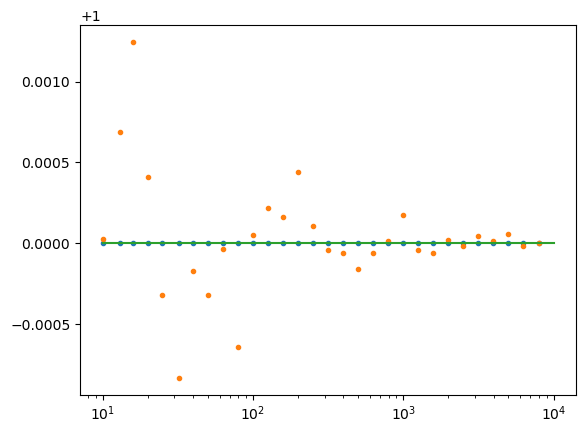

In [25]:
plt.plot(lambda_list, np.array(median_age_list_simple_N) / true_age_array, '.')
plt.plot(lambda_list, np.array(mean_age_list_simple_N) / true_age_array, '.')
plt.xscale('log')
plt.plot([10, 10000], [1, 1])

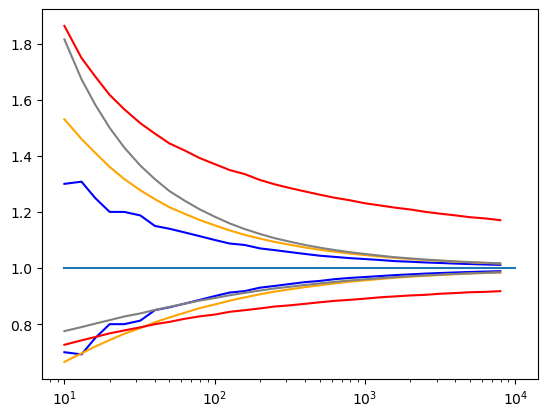

In [293]:
plt.plot(lambda_list, np.array(high_age_list_simple_N) / true_age_array, color='blue')
plt.plot(lambda_list, np.array(low_age_list_simple_N) / true_age_array, color='blue')
plt.plot(lambda_list, np.array(high_age_list_unbinned_corrected) / true_age_array, color='orange')
plt.plot(lambda_list, np.array(low_age_list_unbinned_corrected) / true_age_array, color='orange')
plt.plot(lambda_list, np.array(high_age_list_unbinned) / true_age_array, color='gray')
plt.plot(lambda_list, np.array(low_age_list_unbinned) / true_age_array, color='gray')
plt.plot(lambda_list, np.array(high_age_list_left) / true_age_array, color='red')
plt.plot(lambda_list, np.array(low_age_list_left) / true_age_array, color='red')
plt.xscale('log')
plt.plot([10, 10000], [1, 1])

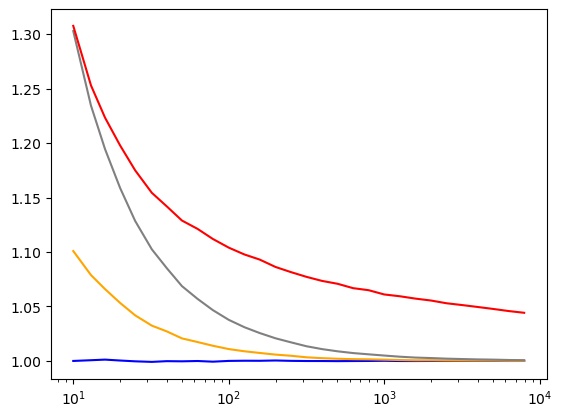

In [295]:
plt.plot(lambda_list, np.array(mean_age_list_simple_N) / true_age_array, color='blue')
plt.plot(lambda_list, np.array(mean_age_list_unbinned_corrected) / true_age_array, color='orange')
plt.plot(lambda_list, np.array(mean_age_list_unbinned) / true_age_array, color='gray')
plt.plot(lambda_list, np.array(mean_age_list_left) / true_age_array, color='red')
plt.xscale('log')
#plt.plot([10, 10000], [1, 1])

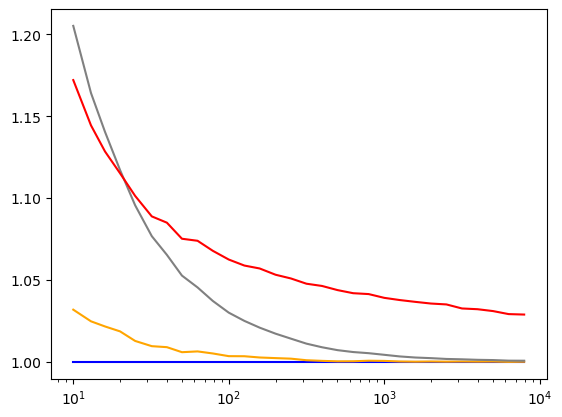

In [296]:
plt.plot(lambda_list, np.array(median_age_list_simple_N) / true_age_array, color='blue')
plt.plot(lambda_list, np.array(median_age_list_unbinned_corrected) / true_age_array, color='orange')
plt.plot(lambda_list, np.array(median_age_list_unbinned) / true_age_array, color='gray')
plt.plot(lambda_list, np.array(median_age_list_left) / true_age_array, color='red')
plt.xscale('log')
#plt.plot([10, 10000], [1, 1])

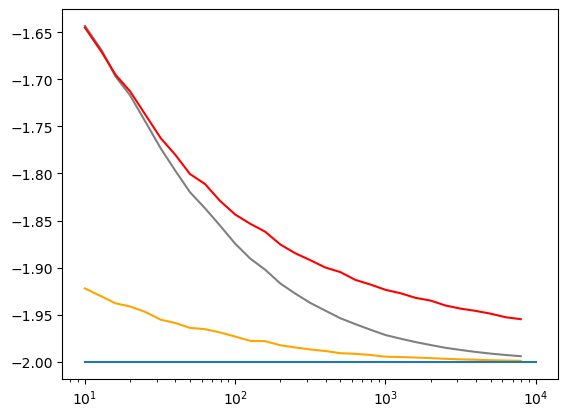

In [299]:
plt.plot(lambda_list, np.array(median_slope_list_unbinned_corrected), color='orange')
plt.plot(lambda_list, np.array(median_slope_list_unbinned), color='gray')
plt.plot(lambda_list, np.array(median_slope_list_left), color='red')
plt.xscale('log')
plt.plot([10, 10000], [-2, -2])

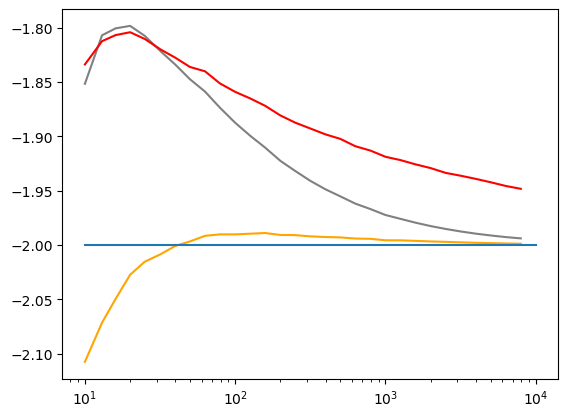

In [300]:
plt.plot(lambda_list, np.array(mean_slope_list_unbinned_corrected), color='orange')
plt.plot(lambda_list, np.array(mean_slope_list_unbinned), color='gray')
plt.plot(lambda_list, np.array(mean_slope_list_left), color='red')
plt.xscale('log')
plt.plot([10, 10000], [-2, -2])

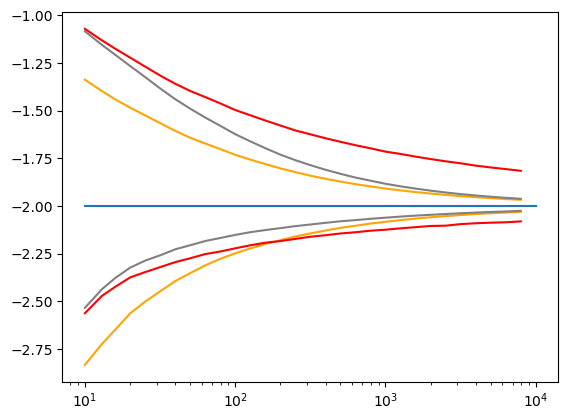

In [302]:
plt.plot(lambda_list, np.array(high_slope_list_unbinned_corrected), color='orange')
plt.plot(lambda_list, np.array(high_slope_list_unbinned), color='gray')
plt.plot(lambda_list, np.array(high_slope_list_left), color='red')
plt.plot(lambda_list, np.array(low_slope_list_unbinned_corrected), color='orange')
plt.plot(lambda_list, np.array(low_slope_list_unbinned), color='gray')
plt.plot(lambda_list, np.array(low_slope_list_left), color='red')
plt.xscale('log')
plt.plot([10, 10000], [-2, -2])

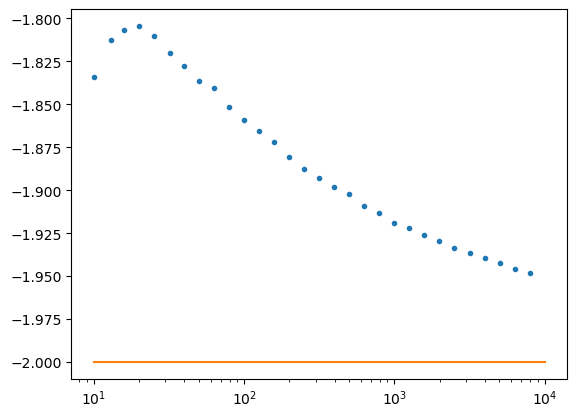

In [283]:
mean_list_left = [np.mean(slope_list) for slope_list in slope_list_list_left]
plt.plot(lambda_list, mean_list_left, '.')
plt.xscale('log')
plt.plot([10, 10000], [-2, -2])

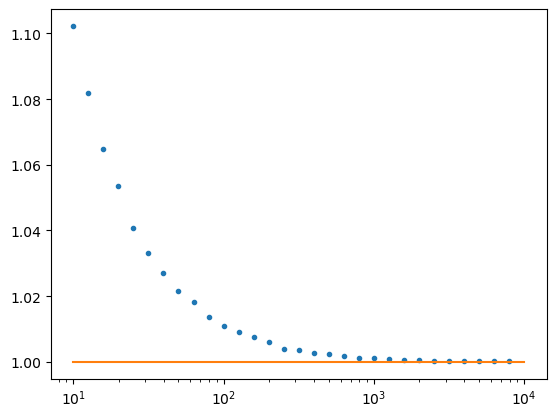

In [26]:
true_age_array = np.array([synth_tuple[1] for synth_tuple in synth_list_list])
mean_array = np.array([np.mean(age_list) for age_list in age_list_list_left])
plt.plot(lambda_list, mean_array / true_age_array, '.')
plt.xscale('log')
plt.plot([10, 10000], [1.0, 1.0])

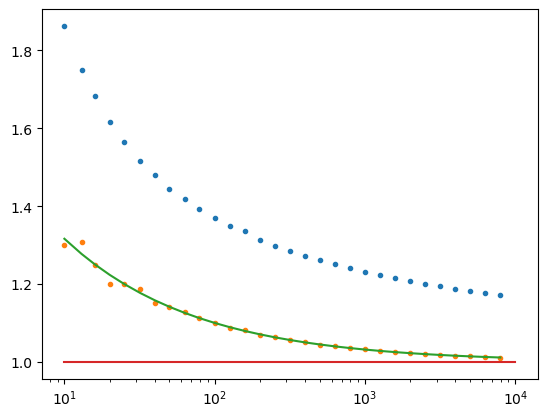

In [55]:
true_age_array = np.array([synth_tuple[1] for synth_tuple in synth_list_list])
mean_array_left = np.array([np.percentile(age_list, 100 * p_1_sigma) for age_list in age_list_list_left])
plt.plot(lambda_list, mean_array_left / true_age_array, '.')
mean_array_simple_N = np.array([np.percentile(age_list, 100 * p_1_sigma) for age_list in age_list_list_simple_N])
plt.plot(lambda_list, mean_array_simple_N / true_age_array, '.')
plt.plot(lambda_list, (lambda_list + np.sqrt(lambda_list)) / lambda_list, '-')
plt.xscale('log')
plt.plot([10, 10000], [1.0, 1.0])

In [59]:
age_matrix = np.array([fit_age_data(age_list) for age_list in age_list_list_left])

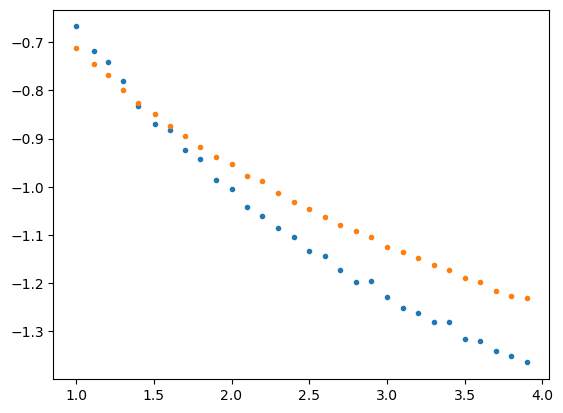

In [71]:
plt.plot(np.log10(lambda_list), np.log10(age_matrix[:, 1]), '.')
plt.plot(np.log10(lambda_list), np.log10(age_matrix[:, 2]), '.')

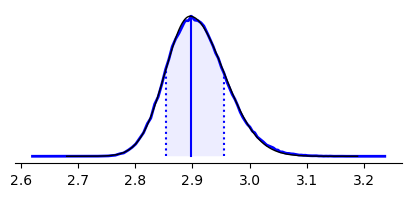

In [57]:
make_pdf_from_samples(age_list_list_left[-1]).cut_below(0).log().plot()
log_max, log_lower, log_upper = fit_age_data(age_list_list_left[-1])
plot_log_of_normal_fit(log_max, log_lower, log_upper, color='black')